## Key Plots

1. Evoke and record AP and calcium conductance in all sites
2. Plot it
3. Plot each subpanel separately so it looks good
4. Plot the Na/K channel conductance graph and the three variants...

In [1]:
%load_ext autoreload
%autoreload

import numpy as np
from neuron import h
from matplotlib import pyplot as plt
import matplotlib as mpl

from src.collection_L23 import L23
import src.morphologyFunctions as mfx
import src.neuronFunctions as nfx

In [2]:
# Create Cell
for sec in h.allsec(): h.delete_section(sec=sec)
cell1 = L23(cellID=0,dendNa=[5,2,150,True],dendK=[0.05,100,True,False],dxSeg=5,fixDiam=None)

Creating cell : L23
	0 
	1 
	1 
	1 
	1 


In [3]:
# Record response of AP at all desired sites
stim1 = nfx.attachCC(cell1.soma, delay=5, dur=1, amp=3.5, loc=0.5) # set stim up for somatic injection

# Find Sites and Set up Recording Vectors
distance = 125
dName,dSeg,dPost,dPre,dBrDist = mfx.findSites(cell1.soma, distance, method='struct', dends=cell1.dends, incDiam=False)[0:5] 
dPostDiam = mfx.findSites(cell1.soma, distance, method='struct', dends=cell1.dends, incDiam=True)[2]

# Record peak of AP in all the sites
vsec,tv = mfx.recordSites(dName,dSeg)
vsoma = h.Vector()
vsoma.record(cell1.soma(0.5)._ref_v) # Also record soma...

# Record ica in all sites + soma
csec = mfx.recordSites(dName,dSeg,recordVariable='_ref_ica')[0]
csoma = h.Vector()
csoma.record(cell1.soma(0.5)._ref_ica)

# Record Calcium Concentration in Soma
cai = h.Vector()
cai.record(cell1.soma(0.5)._ref_cai)

# Simulate Data
nfx.simulate(tstop=25,v_init=-75,celsius=35)

gca_soma = nfx.conductanceFromCurrent(csoma,vsoma,cell1.Eca)
gca_sec = []
for ica,v in zip(csec,vsec):
    gca_sec.append(nfx.conductanceFromCurrent(ica,v,cell1.Eca))
    
# Analyze Data
vData = np.array(vsec)
gcaData = np.array(gca_sec)
icaData = np.array(csec)
apAmp = np.amax(vData,axis=1)
gcAmp = np.amax(gcaData,axis=1)
icAmp = np.amin(icaData,axis=1)

stim1 = None

Text(0, 0.5, 'Calcium Concentration')

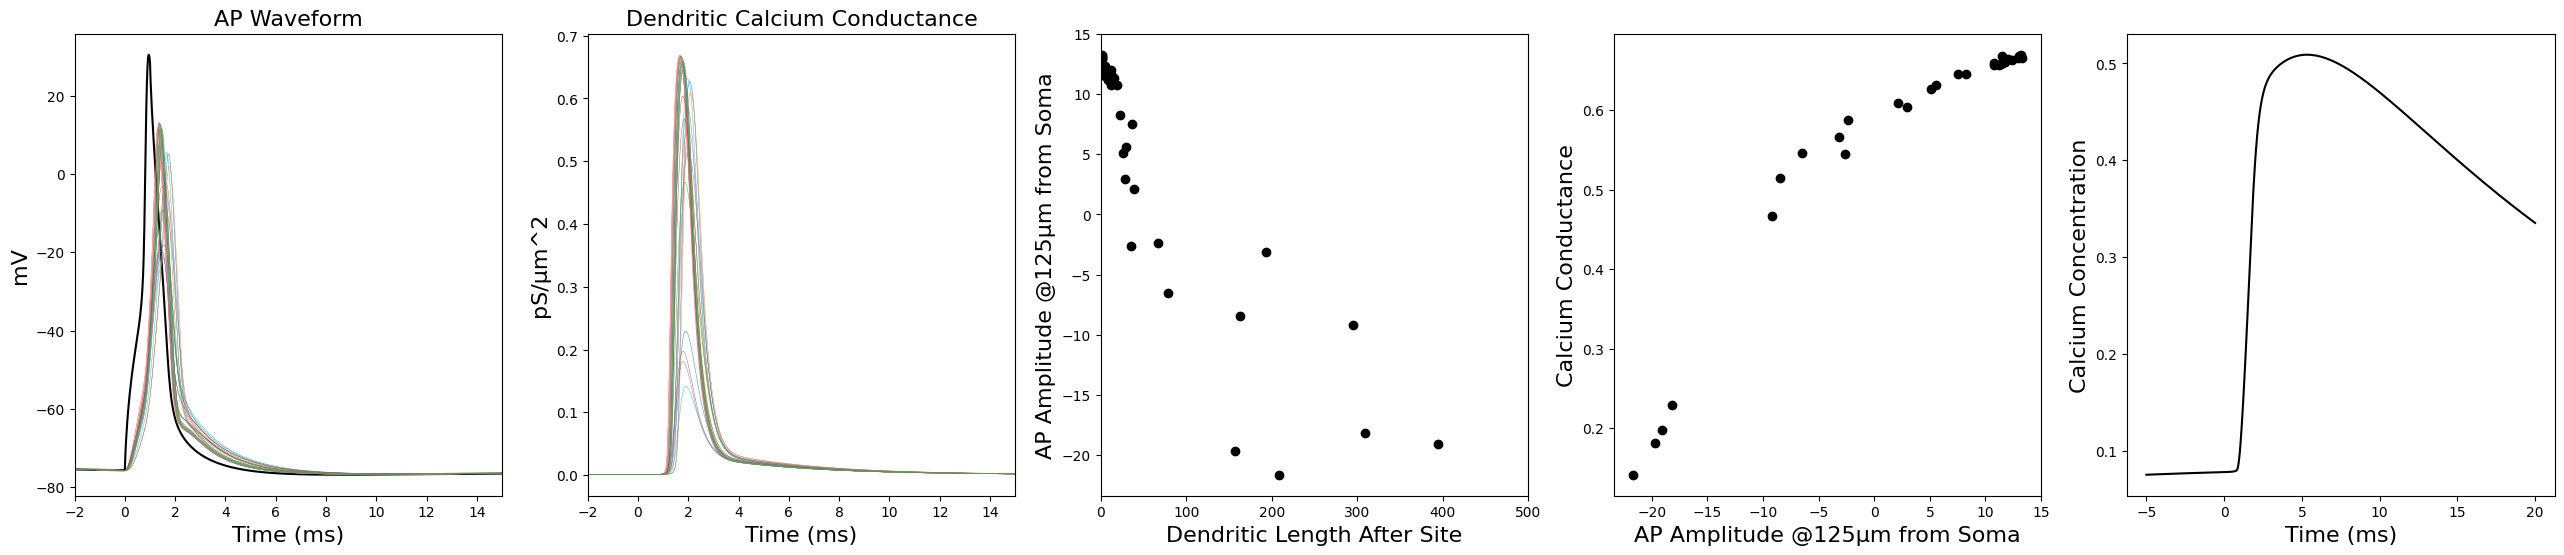

In [4]:
# Plot Somatic AP
fig = plt.figure(figsize=(32,6))

# Plot somatic and dendritic APs
plt.subplot(1,5,1)
plt.plot(tv-5,vsoma,alpha=1,linewidth=1.5,c='k')
p = plt.plot(tv-5,vData.T,alpha=1,linewidth=0.3)
plt.xlim(-2,15)
plt.xlabel('Time (ms)',fontsize=16)
plt.ylabel('mV',fontsize=16)
plt.title('AP Waveform',fontsize=16)

# Plot dendritic calcium conductance
plt.subplot(1,5,2) 
p = plt.plot(tv-5,gcaData.T,alpha=1,linewidth=0.3)
plt.xlim(-2,15)
plt.xlabel('Time (ms)',fontsize=16)
plt.ylabel('pS/µm^2',fontsize=16)
plt.title('Dendritic Calcium Conductance',fontsize=16)

# Plot relationship between voltage and dendritic length after site
plt.subplot(1,5,3)
plt.scatter(dPost,apAmp,c='k')
plt.xlabel('Dendritic Length After Site',fontsize=16)
plt.ylabel('AP Amplitude @125µm from Soma',fontsize=16)
plt.xlim(0,500)

# Plot relationship between voltage and dendritic length after site
plt.subplot(1,5,4)
plt.scatter(apAmp,gcAmp,c='k')
plt.xlabel('AP Amplitude @125µm from Soma',fontsize=16)
plt.ylabel('Calcium Conductance',fontsize=16)

# Plot Somatic Calcium Concentration
plt.subplot(1,5,5)
plt.plot(tv-5,1e3*np.array(cai),alpha=1,linewidth=1.5,c='k')
plt.xlabel('Time (ms)',fontsize=16)
plt.ylabel('Calcium Concentration',fontsize=16)


Text(0.5, 1.0, 'AP Waveform')

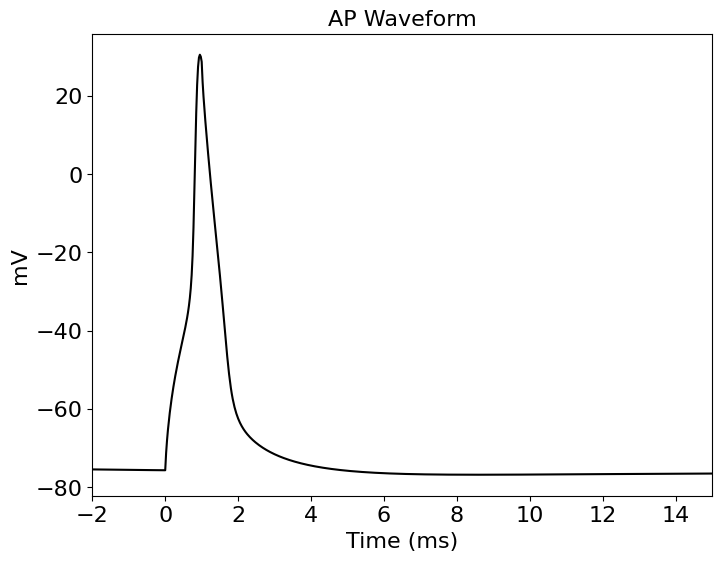

In [6]:
# Plot Somatic AP
fig = plt.figure(figsize=(8,6))

# Plot somatic and dendritic APs
plt.plot(tv-5,vsoma,alpha=1,linewidth=1.5,c='k')
#p = plt.plot(tv-5,vData.T,alpha=1,linewidth=0.3)
plt.xlim(-2,15)
plt.xlabel('Time (ms)',fontsize=16)
plt.ylabel('mV',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('AP Waveform',fontsize=16)
# plt.savefig('PresentationsFigures/somaAPPlot')


Text(0.5, 1.0, 'AP Ca Conductance')

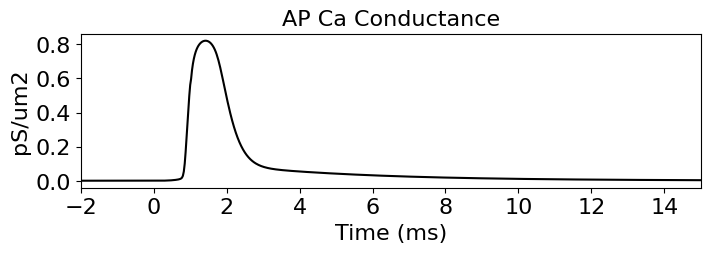

In [7]:
# Plot Somatic AP
fig = plt.figure(figsize=(8,2))

# Plot somatic and dendritic APs
plt.plot(tv-5,gca_soma,alpha=1,linewidth=1.5,c='k')
plt.xlim(-2,15)
plt.xlabel('Time (ms)',fontsize=16)
plt.ylabel('pS/um2',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('AP Ca Conductance',fontsize=16)
# plt.savefig('PresentationsFigures/somaCaConductancePlot')


Text(0.5, 1.0, 'Injected Current')

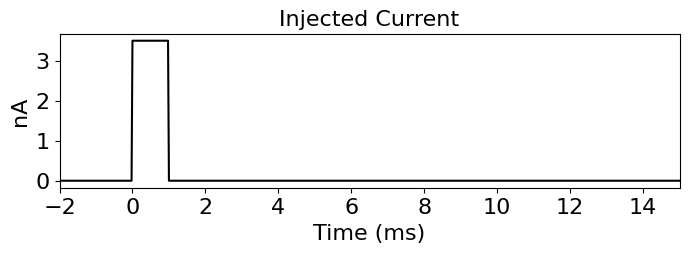

In [8]:
# Plot Somatic AP
fig = plt.figure(figsize=(8,2))

injCurrent = np.zeros(len(tv))
injCurrent[np.where((np.array(tv)>=5) & (np.array(tv)<=6))]= 3.5

# Plot somatic and dendritic APs
plt.plot(tv-5,injCurrent,alpha=1,linewidth=1.5,c='k')
#p = plt.plot(tv-5,vData.T,alpha=1,linewidth=0.3)
plt.xlim(-2,15)
plt.xlabel('Time (ms)',fontsize=16)
plt.ylabel('nA',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Injected Current',fontsize=16)
# plt.savefig('PresentationsFigures/curInjectPlot')


Text(0.5, 1.0, 'Dendritic AP Waveform')

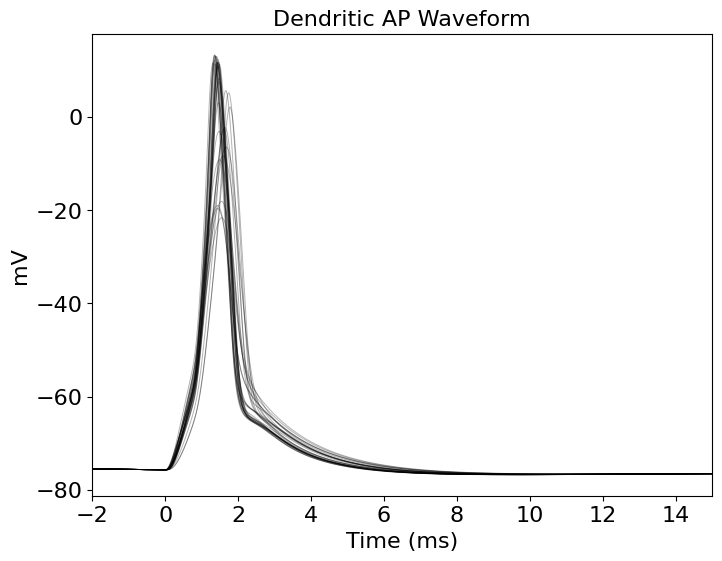

In [9]:
# Plot somatic and dendritic APs
plt.figure(figsize=(8,6))
p = plt.plot(tv-5,vData.T,alpha=0.3,linewidth=0.7,c='k')
plt.xlim(-2,15)
plt.xlabel('Time (ms)',fontsize=16)
plt.ylabel('mV',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Dendritic AP Waveform',fontsize=16)
# plt.savefig('PresentationsFigures/dendriticAPs')

Text(0.5, 1.0, 'Dendritic Calcium Conductance')

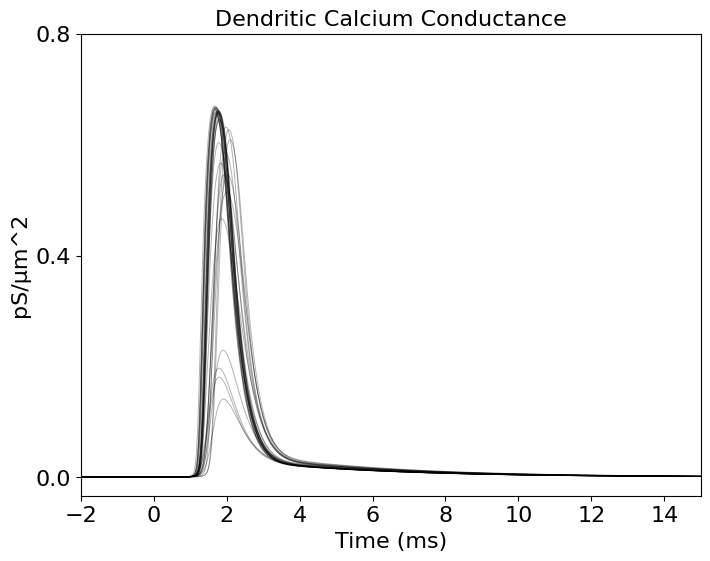

In [10]:
plt.figure(figsize=(8,6))
p = plt.plot(tv-5,gcaData.T,alpha=0.3,linewidth=0.7,c='k')
plt.xlim(-2,15)
plt.xlabel('Time (ms)',fontsize=16)
plt.ylabel('pS/µm^2',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(ticks=[0,0.4,0.8],fontsize=16)
plt.title('Dendritic Calcium Conductance',fontsize=16)
# plt.savefig('PresentationsFigures/dendriticConductance')

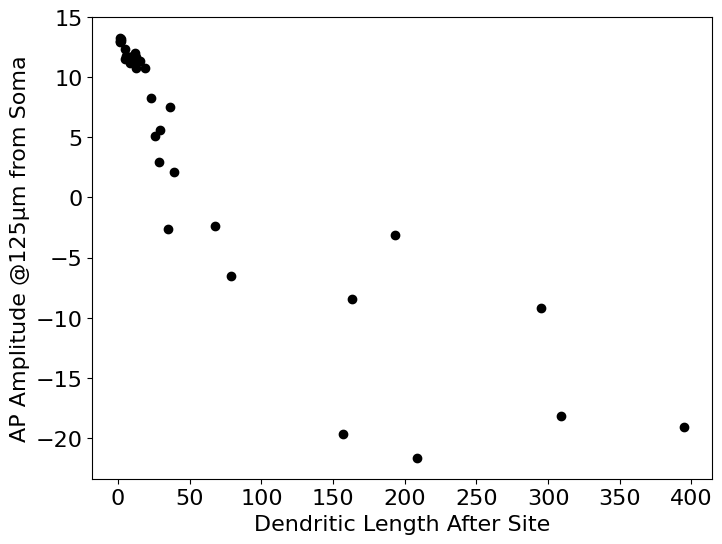

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(dPost,apAmp,c='k')
plt.xlabel('Dendritic Length After Site',fontsize=16)
plt.ylabel('AP Amplitude @125µm from Soma',fontsize=16)
#plt.xlim(0,2000)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
# plt.savefig('PresentationsFigures/ScatterBranchingAP')

Creating cell : 29_CDK170205_registered_D2
	1 


Text(0.5, 0, 'Z axis')

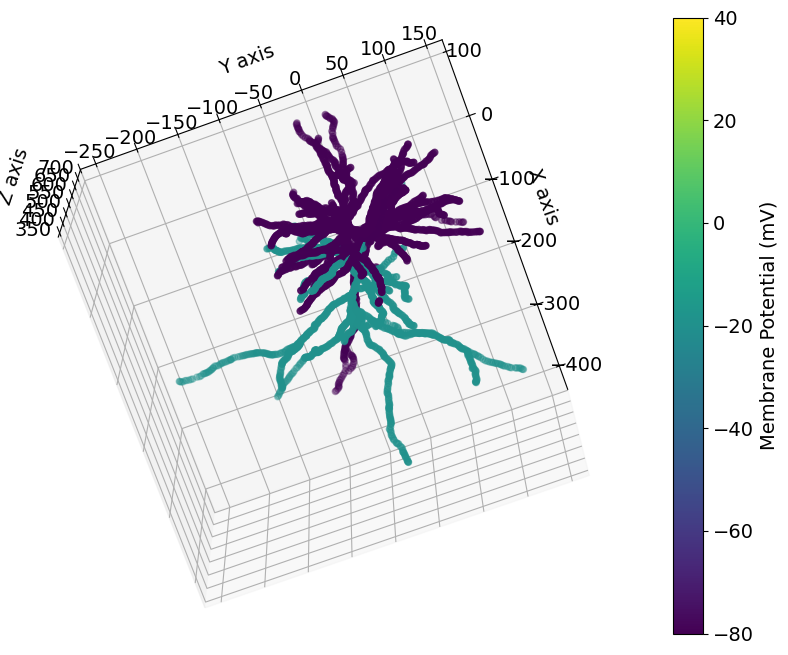

In [13]:
# Create Cell
for sec in h.allsec(): h.delete_section(sec=sec)

# Usage example:
cell_params = {
    'cellID': 1,
    'dendNa': [4, 2, 150, True],
    'dendK': [0.02, 1000, True, False],
    'dxSeg': 5,
    'fixDiam': None
}

cell1 = L23(**cell_params)

coordPlot = [[],[-75,180]]

secList = h.SectionList([sec for sec in h.allsec() if 'axon' not in str(sec) and 'ais' not in str(sec)])
for sec in secList:
    sec.v = -80
    if 'apic' in str(sec):
        sec.v = -20

# ps = h.PlotShape(secList, False)
# ps.scale(-80,40)
# ps.variable('v')
# fig = plt.figure(figsize=(12,8))
# ax = ps.plot(fig)
# ax.view_init(-75,20) # -75, 200
# plt.xlabel('X axis')
# plt.ylabel('Y axis')
# # ax.set_zlabel('Z axis')
# plt.show()



# Collect 3D coordinates
x, y, z = [], [], []
v = []  # membrane potential values

for sec in secList:
    n3d = int(h.n3d(sec=sec))
    for i in range(n3d):
        x.append(h.x3d(i, sec=sec))
        y.append(h.y3d(i, sec=sec))
        z.append(h.z3d(i, sec=sec))
        v.append(sec.v)

# Create visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points colored by membrane potential
scatter = ax.scatter(x, y, z, c=v, cmap='viridis', 
                    vmin=-80, vmax=40)

# Add a colorbar
plt.colorbar(scatter, label='Membrane Potential (mV)')

# Set the view angle
ax.view_init(-75, 20)

# Labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

Creating cell : L23
	0 
	1 
	1 
	1 
	1 
Creating cell : L23
	0 
	1 
	1 
	1 
	1 
Creating cell : L23
	0 
	1 
	1 
	1 
	1 


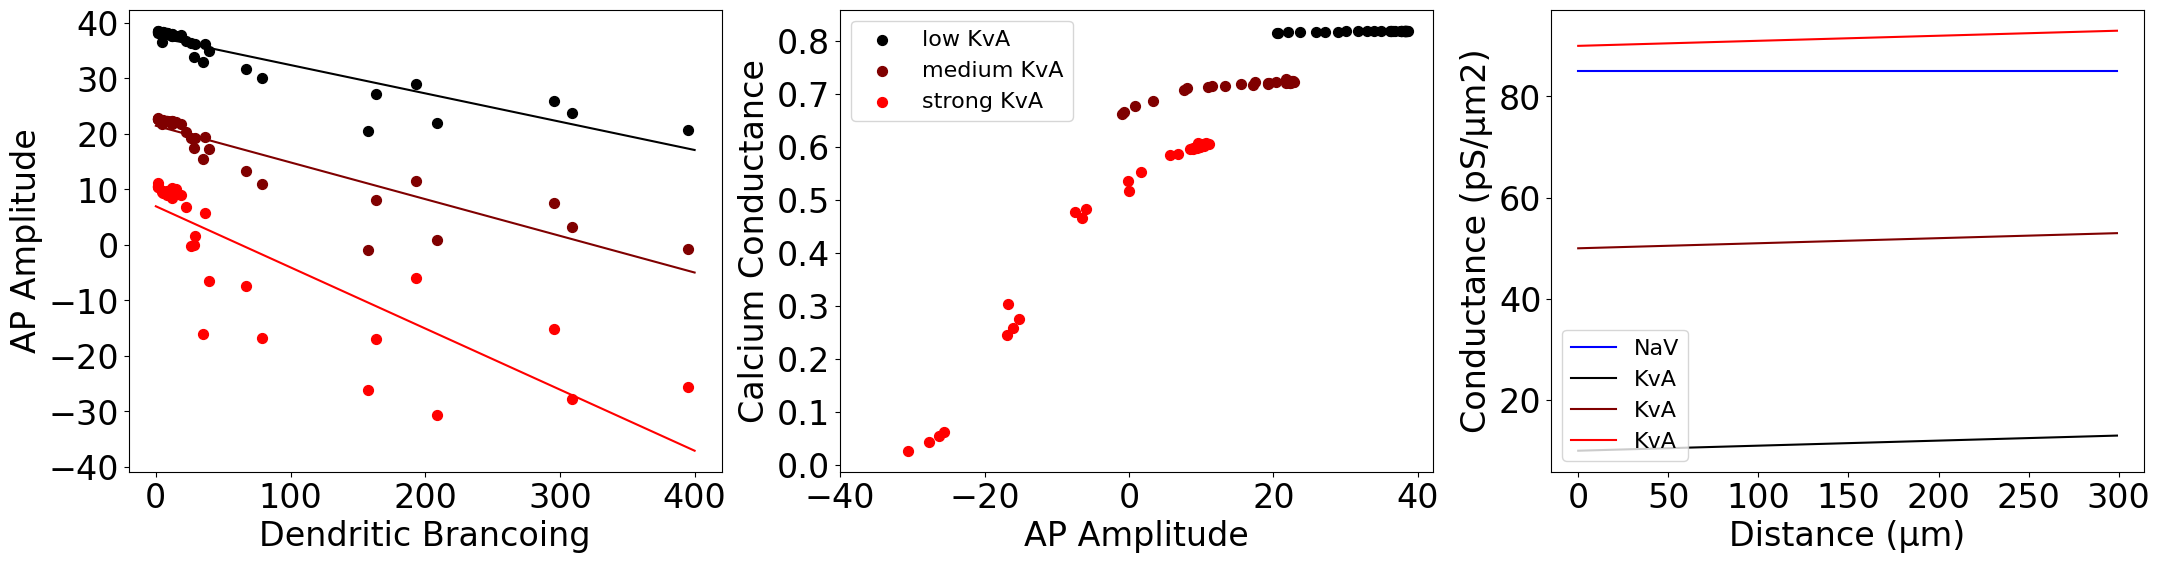

In [ ]:
# Show different K values for cat cell 
NK = 3
kVal = np.linspace(0.01,0.09,NK)
kCol = np.linspace(0,1,NK)
fig = plt.figure(figsize=(26,6))
labelName = ['low KvA','medium KvA','strong KvA']

for k in range(NK):   
    for sec in h.allsec(): h.delete_section(sec=sec)
    cell1 = L23(cellID=0,dendNa=[5,5,150,True],dendK=[kVal[k],100,True,False],dxSeg=5,fixDiam=None)
    
    # Record response of AP at all desired sites
    stim1 = nfx.attachCC(cell1.soma, delay=5, dur=1, amp=3.5, loc=0.5) # set stim up for somatic injection

    # Find Sites and Set up Recording Vectors
    distance = 125
    dName,dSeg,dPost,dPre,dBrDist = mfx.findSites(cell1.soma, distance, method='struct', dends=cell1.dends, incDiam=False)[0:5]
    
    startDistance = []
    for d in dName:
        startDistance.append(h.distance(cell1.soma(1),d(0)))
    
    idxDistance = np.where(np.array(startDistance)>0) #used to be 50
    
    # Record peak of AP in all the sites
    vsec,tv = mfx.recordSites(dName,dSeg)
    csec = mfx.recordSites(dName,dSeg,recordVariable='_ref_ica')[0]
    
    # Simulate Data
    nfx.simulate(tstop=25,v_init=-75,celsius=35)
    
    gca_sec = []
    for ica,v in zip(csec,vsec):
        gca_sec.append(nfx.conductanceFromCurrent(ica,v,cell1.Eca))

    # Analyze Data
    vData = np.array(vsec)
    apAmp = np.amax(vData,axis=1)
    gcaData = np.array(gca_sec)
    gcAmp = np.amax(gcaData,axis=1)
    
    # Reset Stim
    stim1 = None
    
    # Plot the results for this cell
    plt.subplot(1,3,1)
    p = plt.scatter(dPost[idxDistance],apAmp[idxDistance],color=(kCol[k],0,0),s=50)
    m, b = np.polyfit(dPost[idxDistance],apAmp[idxDistance], 1)
    plt.plot([0,400],b + [m*0,m*400],c=p.get_facecolor()[0][0:3])
    
    plt.subplot(1,3,2)
    p = plt.scatter(apAmp[idxDistance],gcAmp[idxDistance],label='{}'.format(labelName[k]),color=(kCol[k],0,0),s=50)

# And label 
plt.subplot(1,3,1)
plt.xticks(np.arange(0,401,100),fontsize=24)
plt.yticks(fontsize=24)
#plt.ylim(-40,45)
plt.xlabel('Dendritic Brancoing',fontsize=24)
plt.ylabel('AP Amplitude',fontsize=24)
#plt.xlim(0,45)

plt.subplot(1,3,2)
plt.xticks(np.arange(-40,41,20),fontsize=24)
plt.yticks(fontsize=24)
#plt.ylim(0,1)
plt.xlabel('AP Amplitude',fontsize=24)
plt.ylabel('Calcium Conductance',fontsize=24)
plt.legend(fontsize=16)
#plt.xlim(0,45)

# -- and show the conductances --
xx = np.arange(0,300)
plt.subplot(1,3,3)
nav = np.array(5*17)+np.array(17*0*np.exp(-xx/150))
plt.plot(xx,nav,c='b',label='NaV')
for k in range(NK):
    kva = np.array(1000*kVal[k])+np.array(xx/100)
    plt.plot(xx,kva,color=(kCol[k],0,0),label='KvA')

#plt.ylim(0,70)
plt.xlabel('Distance (µm)',fontsize=24)
plt.ylabel('Conductance (pS/µm2)',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=16)
#plt.savefig('PresentationsFigures/DecrementDensity_FlatSodium')
#plt.scatter(dd,kd,c='r')